Average Signal = 642.1428571428571
Standard Deviation = 0.9897433186107869


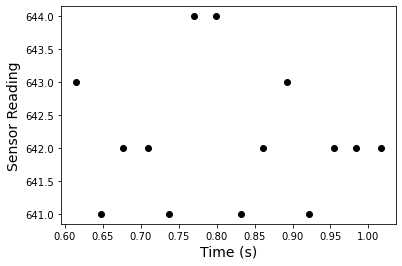

In [1]:
%matplotlib inline
import serial
import time
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Directory you'll write your data to - you'll need to change this!
outdir = '/Users/Joe/Desktop/python/'

# Filename for your data - change this for each measurement
name = 'test'

# Number of seconds to acquire data for - bigger n = more averaging
n = 1

###########################
# All the rest can be left alone - unless you're interested!
###########################
# Define some useful lists - the first is our sensor value, the second is the time the measurement took place
s_list, t_list = [], []

# Chooses the right port to speak to the Arduino
dev = os.listdir('/dev/')
for i in range(0,len(dev))[::-1]:
    if 'cu.usbmodem' not in dev[i]:
        del dev[i]
dev = '/dev/' + dev[0]

# Open a channel to our Arduino
ser = serial.Serial(dev, 9600)
time.sleep(1) # Give connection a second to settle

# Start a timer
t0 = time.time()   # Read system time
t = time.time() - t0   # t=0

while t < n:
    # Read the sensor value and tidy it up - to understand what each line does
    # type "print(data_in)" after each line - I've done the first one for you
    data_in = ser.read(15)
    data_in = str(data_in)
    data_in = data_in.split('\\r\\n')
    s_list.append(float(data_in[1]))  # Pick only one reading - discard the first

    # Calculate time - add to the list
    t = time.time() - t0
    t_list.append(float(t))

    # Arduino writes data faster than python reads
    # So flush serial buffer
    ser.flush()
    ser.flushInput()
    ser.flushOutput()
  
data_out = pd.DataFrame({'Time (s)':t_list, 'S':s_list})
data_out.to_csv(outdir + name + '.csv', index=False)  

# Print out the mean and standard deviation of the signal from your Arduino
print('Average Signal =', np.mean(s_list))
print('Standard Deviation =', np.std(s_list))

# Draw a graph
fs = 14
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(t_list, s_list, c='black')
ax.set_xlabel('Time (s)', size=fs)
ax.set_ylabel('Sensor Reading', size=fs)

# Save the graph
plt.savefig(outdir + name + '.png', dpi=300, bbox_inches='tight')


In [2]:
# Extra code to check the USB ports in your system
import serial.tools.list_ports
ports = list(serial.tools.list_ports.comports())
for p in ports:
    print(p)

/dev/cu.Bluetooth-Incoming-Port - n/a
